In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix

In [147]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
df = pd.read_csv('NTP Final Dataset.csv')
df.head()

,CLAIM_NUMBER,LINE_NUMBER,MEMBER_NUMBER,CURRENTAGE,SUFFIX,PATIENTNAME,GENDER,CURRENTAGE_1,CLAIMED,PAID,...,REFERRAL,PCKAGE,TARIFF_AMOUNT,PAY_WHO,MODIFIER_STRING,FIRMNO,SHORTFALLREASON,PROVIDERTYPE,AGE,Class
0,31184,1,30400166634,39.921212,2,TASHINGA,F,39.921212,450.0,258.0,...,10782.0,304,258.0,M,NaN,CMS004KAO,101,18,ABOVE 22,proceed
1,56041,1,30400171454,36.948093,1,EMILY,F,36.948093,70.0,17.5,...,1244.0,304,25.0,M,NaN,CMS004MUR,101,18,ABOVE 22,proceed
2,86876,1,30001814165,38.128201,1,FADZAI,F,38.128201,25.0,17.5,...,5058.0,300,25.0,M,NaN,CMS001TNQ,101,18,ABOVE 22,proceed
3,117280,1,40000064456,60.203470,2,BHAVNA,F,60.203470,300.0,135.0,...,18192.0,400,135.0,V,NaN,CMS001SHC,101;535,18,ABOVE 22,proceed
4,117281,1,40000064456,60.203470,2,BHAVNA,F,60.203470,200.0,200.0,...,18192.0,400,250.0,V,NaN,CMS001SHC,101,18,ABOVE 22,proceed


In [149]:
df.isnull().sum()

CLAIM_NUMBER               0
LINE_NUMBER                0
MEMBER_NUMBER              0
CURRENTAGE                 0
SUFFIX                     0
PATIENTNAME                0
GENDER                     0
CURRENTAGE_1               0
CLAIMED                    0
PAID                       0
SHORTFALL                  0
PRACTICE_NUMBER            0
PRACTICE_NAME              0
SPE_SPECIALITY_CODE        0
DESCRIPTION                0
DATE_RECEIVED              0
PROCESS_DATE               0
PAYDATE                    0
SERVICEDATE                0
TARIFF_CODE                0
DESCRIPTION_1              0
QUANTITY                   0
REFERRAL                 169
PCKAGE                     0
TARIFF_AMOUNT              0
PAY_WHO                    0
MODIFIER_STRING        44304
FIRMNO                   428
SHORTFALLREASON        10793
PROVIDERTYPE               0
AGE                        0
Class                      0
dtype: int64

In [150]:
df1 = df.drop(columns = ['LINE_NUMBER','SUFFIX','PATIENTNAME','CURRENTAGE_1','SHORTFALL', 'DATE_RECEIVED', 'PROCESS_DATE','PAYDATE','SERVICEDATE','DESCRIPTION_1','QUANTITY','REFERRAL','PCKAGE','PAY_WHO','MODIFIER_STRING','FIRMNO','SHORTFALLREASON','AGE'], axis = 1)

In [151]:
df1.head()

,CLAIM_NUMBER,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PAID,PRACTICE_NUMBER,PRACTICE_NAME,SPE_SPECIALITY_CODE,DESCRIPTION,TARIFF_CODE,TARIFF_AMOUNT,PROVIDERTYPE,Class
0,31184,30400166634,39.921212,F,450.0,258.0,18001,ILIFF VF,18,GYNAECOLOGY/OBSTETRICS,58984,258.0,18,proceed
1,56041,30400171454,36.948093,F,70.0,17.5,18015,SUDDENS MD,18,GYNAECOLOGY/OBSTETRICS,59477,25.0,18,proceed
2,86876,30001814165,38.128201,F,25.0,17.5,18222,JEKETERA C.,18,GYNAECOLOGY/OBSTETRICS,59477,25.0,18,proceed
3,117280,40000064456,60.203470,F,300.0,135.0,18192,DJORDJEVIC D,18,GYNAECOLOGY/OBSTETRICS,58120,135.0,18,proceed
4,117281,40000064456,60.203470,F,200.0,200.0,18192,DJORDJEVIC D,18,GYNAECOLOGY/OBSTETRICS,52100,250.0,18,proceed


In [152]:
df1.isnull().sum()

CLAIM_NUMBER           0
MEMBER_NUMBER          0
CURRENTAGE             0
GENDER                 0
CLAIMED                0
PAID                   0
PRACTICE_NUMBER        0
PRACTICE_NAME          0
SPE_SPECIALITY_CODE    0
DESCRIPTION            0
TARIFF_CODE            0
TARIFF_AMOUNT          0
PROVIDERTYPE           0
Class                  0
dtype: int64

In [153]:
df1.shape

(45854, 14)

## Visualization

In [154]:
#Visualization of the data set
def bar_chart(col):
    Approved = df[df['Class']=='proceed'][col].value_counts()
    Fraud = df[df['Class']=='possible fraud'][col].value_counts()
    
    df2 = pd.DataFrame([Approved, Fraud])
    df2.index = ['Approved', 'Fraud']
    df2.plot(kind='bar')

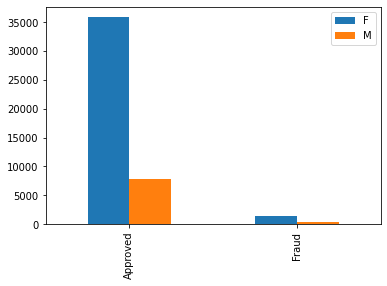

In [155]:
bar_chart('GENDER')

In [156]:
import seaborn as sns

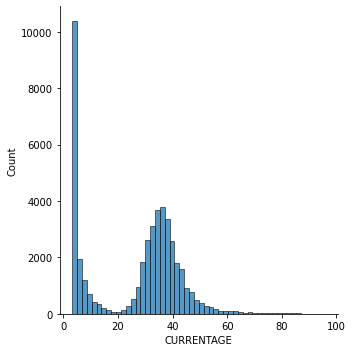

In [157]:
sns.displot(df['CURRENTAGE'])

In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45854 entries, 0 to 45853
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAIM_NUMBER         45854 non-null  int64  
 1   MEMBER_NUMBER        45854 non-null  int64  
 2   CURRENTAGE           45854 non-null  float64
 3   GENDER               45854 non-null  object 
 4   CLAIMED              45854 non-null  float64
 5   PAID                 45854 non-null  float64
 6   PRACTICE_NUMBER      45854 non-null  int64  
 7   PRACTICE_NAME        45854 non-null  object 
 8   SPE_SPECIALITY_CODE  45854 non-null  int64  
 9   DESCRIPTION          45854 non-null  object 
 10  TARIFF_CODE          45854 non-null  int64  
 11  TARIFF_AMOUNT        45854 non-null  float64
 12  PROVIDERTYPE         45854 non-null  int64  
 13  Class                45854 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 4.9+ MB


<AxesSubplot:>

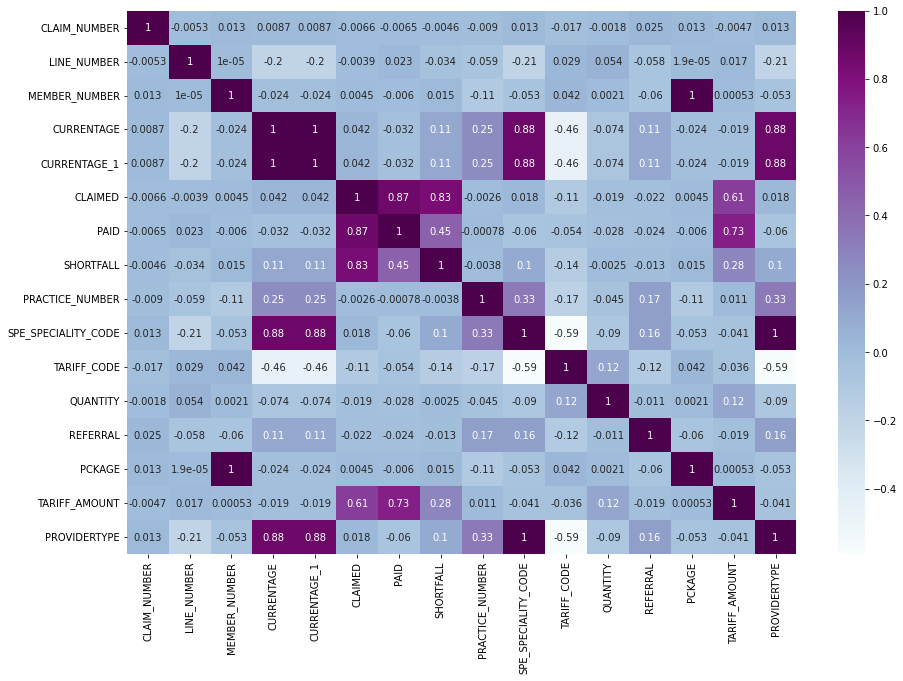

In [159]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True, cmap='BuPu')

In [160]:
train_dataset.head()

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30400166634,39.921212,F,450.0,18001,GYNAECOLOGY/OBSTETRICS,58984,proceed
1,30400171454,36.948093,F,70.0,18015,GYNAECOLOGY/OBSTETRICS,59477,proceed
2,30001814165,38.128201,F,25.0,18222,GYNAECOLOGY/OBSTETRICS,59477,proceed
3,40000064456,60.203470,F,300.0,18192,GYNAECOLOGY/OBSTETRICS,58120,proceed
4,40000064456,60.203470,F,200.0,18192,GYNAECOLOGY/OBSTETRICS,52100,proceed


In [161]:
train_dataset.head(20)

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30400166634,39.921212,F,450.0,18001,GYNAECOLOGY/OBSTETRICS,58984,proceed
1,30400171454,36.948093,F,70.0,18015,GYNAECOLOGY/OBSTETRICS,59477,proceed
2,30001814165,38.128201,F,25.0,18222,GYNAECOLOGY/OBSTETRICS,59477,proceed
3,40000064456,60.203470,F,300.0,18192,GYNAECOLOGY/OBSTETRICS,58120,proceed
4,40000064456,60.203470,F,200.0,18192,GYNAECOLOGY/OBSTETRICS,52100,proceed
5,30001770670,33.560997,F,100.0,18001,GYNAECOLOGY/OBSTETRICS,90030,possible fraud
6,30001770670,33.560997,F,20.0,18001,GYNAECOLOGY/OBSTETRICS,58101,proceed
7,30001814165,38.128201,F,25.0,18222,GYNAECOLOGY/OBSTETRICS,59477,proceed
8,30001070908,41.458846,F,50.0,18222,GYNAECOLOGY/OBSTETRICS,90030,proceed
9,30001070908,41.458846,F,9.0,18222,GYNAECOLOGY/OBSTETRICS,58101,proceed


In [162]:
train_dataset = df1.drop(columns = ['SPE_SPECIALITY_CODE','PRACTICE_NAME','CLAIM_NUMBER','PROVIDERTYPE'], axis = 1)

In [163]:
train_dataset = df1.drop(columns = ['SPE_SPECIALITY_CODE','PRACTICE_NAME','CLAIM_NUMBER','PROVIDERTYPE','TARIFF_AMOUNT','PAID'], axis = 1)

In [164]:
train_dataset.head()

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30400166634,39.921212,F,450.0,18001,GYNAECOLOGY/OBSTETRICS,58984,proceed
1,30400171454,36.948093,F,70.0,18015,GYNAECOLOGY/OBSTETRICS,59477,proceed
2,30001814165,38.128201,F,25.0,18222,GYNAECOLOGY/OBSTETRICS,59477,proceed
3,40000064456,60.203470,F,300.0,18192,GYNAECOLOGY/OBSTETRICS,58120,proceed
4,40000064456,60.203470,F,200.0,18192,GYNAECOLOGY/OBSTETRICS,52100,proceed


In [165]:
train_dataset.head()

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30400166634,39.921212,F,450.0,18001,GYNAECOLOGY/OBSTETRICS,58984,proceed
1,30400171454,36.948093,F,70.0,18015,GYNAECOLOGY/OBSTETRICS,59477,proceed
2,30001814165,38.128201,F,25.0,18222,GYNAECOLOGY/OBSTETRICS,59477,proceed
3,40000064456,60.203470,F,300.0,18192,GYNAECOLOGY/OBSTETRICS,58120,proceed
4,40000064456,60.203470,F,200.0,18192,GYNAECOLOGY/OBSTETRICS,52100,proceed


In [166]:
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)
train_dataset.head()

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30002065439,4.181964,F,50.0,12009,PAEDIATRICIANS,59455,proceed
1,30001991150,30.367448,F,30.0,188851,GYNAECOLOGY/OBSTETRICS,76281,proceed
2,30000027825,3.910459,F,150.0,12556,PAEDIATRICIANS,93572,proceed
3,30600001355,40.464222,F,30.0,18163,GYNAECOLOGY/OBSTETRICS,90031,proceed
4,30001922521,6.416667,F,120.0,12807,PAEDIATRICIANS,90002,proceed


In [167]:
train_dataset.replace({'GENDER':{'F':1,'M':0}})

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30002065439,4.181964,1,50.0,12009,PAEDIATRICIANS,59455,proceed
1,30001991150,30.367448,1,30.0,188851,GYNAECOLOGY/OBSTETRICS,76281,proceed
2,30000027825,3.910459,1,150.0,12556,PAEDIATRICIANS,93572,proceed
3,30600001355,40.464222,1,30.0,18163,GYNAECOLOGY/OBSTETRICS,90031,proceed
4,30001922521,6.416667,1,120.0,12807,PAEDIATRICIANS,90002,proceed
...,...,...,...,...,...,...,...,...
45849,40400005307,36.781427,1,75.0,18117,GYNAECOLOGY/OBSTETRICS,58300,proceed
45850,30002089861,36.192717,1,25.0,18678,GYNAECOLOGY/OBSTETRICS,59477,proceed
45851,30001417153,38.333333,1,40.0,18309,GYNAECOLOGY/OBSTETRICS,59477,proceed
45852,30000972596,3.520674,0,80.0,12556,PAEDIATRICIANS,90003,proceed


In [168]:

train_dataset = train_dataset.replace({'Class':{'possible fraud ':0,'possible fraud':0, 'proceed':1}})

In [169]:
train_dataset.head()

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30002065439,4.181964,F,50.0,12009,PAEDIATRICIANS,59455,1
1,30001991150,30.367448,F,30.0,188851,GYNAECOLOGY/OBSTETRICS,76281,1
2,30000027825,3.910459,F,150.0,12556,PAEDIATRICIANS,93572,1
3,30600001355,40.464222,F,30.0,18163,GYNAECOLOGY/OBSTETRICS,90031,1
4,30001922521,6.416667,F,120.0,12807,PAEDIATRICIANS,90002,1


In [170]:
train_dataset = train_dataset.replace({'GENDER':{'F':1,'M':0}})

In [171]:
train_dataset.head(10)

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30002065439,4.181964,1,50.0,12009,PAEDIATRICIANS,59455,1
1,30001991150,30.367448,1,30.0,188851,GYNAECOLOGY/OBSTETRICS,76281,1
2,30000027825,3.910459,1,150.0,12556,PAEDIATRICIANS,93572,1
3,30600001355,40.464222,1,30.0,18163,GYNAECOLOGY/OBSTETRICS,90031,1
4,30001922521,6.416667,1,120.0,12807,PAEDIATRICIANS,90002,1
5,30002116044,4.219599,0,80.0,12038,PAEDIATRICIANS,90003,1
6,30499999110,7.413147,0,80.0,12003,PAEDIATRICIANS,90000,1
7,30001681336,6.945405,1,60.0,12119,PAEDIATRICIANS,90001,1
8,30001961135,30.440029,1,40.0,18567,GYNAECOLOGY/OBSTETRICS,90031,1
9,30002129681,37.660459,1,40.0,18023,GYNAECOLOGY/OBSTETRICS,59477,1


In [172]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45854 entries, 0 to 45853
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MEMBER_NUMBER    45854 non-null  int64  
 1   CURRENTAGE       45854 non-null  float64
 2   GENDER           45854 non-null  int64  
 3   CLAIMED          45854 non-null  float64
 4   PRACTICE_NUMBER  45854 non-null  int64  
 5   DESCRIPTION      45854 non-null  object 
 6   TARIFF_CODE      45854 non-null  int64  
 7   Class            45854 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 2.8+ MB


In [173]:
train_dataset.head()

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30002065439,4.181964,1,50.0,12009,PAEDIATRICIANS,59455,1
1,30001991150,30.367448,1,30.0,188851,GYNAECOLOGY/OBSTETRICS,76281,1
2,30000027825,3.910459,1,150.0,12556,PAEDIATRICIANS,93572,1
3,30600001355,40.464222,1,30.0,18163,GYNAECOLOGY/OBSTETRICS,90031,1
4,30001922521,6.416667,1,120.0,12807,PAEDIATRICIANS,90002,1


In [174]:
train_dataset['DESCRIPTION'].value_counts()

GYNAECOLOGY/OBSTETRICS    29779
PAEDIATRICIANS            16075
Name: DESCRIPTION, dtype: int64

In [175]:
train_dataset = train_dataset.replace({'DESCRIPTION':{'GYNAECOLOGY/OBSTETRICS':1,'PAEDIATRICIANS':0}})

In [176]:
train_dataset.head()

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30002065439,4.181964,1,50.0,12009,0,59455,1
1,30001991150,30.367448,1,30.0,188851,1,76281,1
2,30000027825,3.910459,1,150.0,12556,0,93572,1
3,30600001355,40.464222,1,30.0,18163,1,90031,1
4,30001922521,6.416667,1,120.0,12807,0,90002,1


In [177]:
train_dataset['Class'].value_counts()

1    43704
0     2150
Name: Class, dtype: int64

## Train Test Split

In [178]:
x = train_dataset.drop(columns = ['Class', 'MEMBER_NUMBER'], axis = 1)
y = train_dataset['Class']

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)


## Model Trainig

In [180]:
##Create a classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuray is ', model.score(x_train, y_train)*100)
    
    #using cross validation to further check accuracy
    score = cross_val_score(model, x, y, cv = 5)
    print('Cross Validation is', np.mean(score)*100)

In [181]:
import numpy as np

In [182]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)
lg_pred=model.predict(x_test)
model.score(x_test,y_test)
print(classification_report(y_test,lg_pred))
#classify(model,x,y)

              precision    recall  f1-score   support

           0       0.07      0.83      0.13       546
           1       0.98      0.46      0.62     10918

    accuracy                           0.47     11464
   macro avg       0.53      0.64      0.38     11464
weighted avg       0.94      0.47      0.60     11464



In [183]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
lg_pred=model1.predict(x_test)
model1.score(x_test,y_test)
print(classification_report(y_test,lg_pred))
#classify(model,x,y
#classify(model1,x,y)

              precision    recall  f1-score   support

           0       0.76      0.58      0.66       546
           1       0.98      0.99      0.99     10918

    accuracy                           0.97     11464
   macro avg       0.87      0.79      0.82     11464
weighted avg       0.97      0.97      0.97     11464



In [184]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(x_train,y_train)
lg_pred=svm_clf .predict(x_test)
svm_clf .score(x_test,y_test)
print(classification_report(y_test,lg_pred))
#classify(svm_clf,x,y)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       546
           1       0.95      1.00      0.98     10918

    accuracy                           0.95     11464
   macro avg       0.48      0.50      0.49     11464
weighted avg       0.91      0.95      0.93     11464



In [185]:
model2 = ExtraTreesClassifier()
classify(model2,x,y)

Accuray is  99.33120093050304
Cross Validation is 96.96428015529965


In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
lg_pred=knn.predict(x_test)
knn.score(x_test,y_test)
print(classification_report(y_test,lg_pred))
#classify(knn,x,y)

              precision    recall  f1-score   support

           0       0.63      0.55      0.58       546
           1       0.98      0.98      0.98     10918

    accuracy                           0.96     11464
   macro avg       0.80      0.77      0.78     11464
weighted avg       0.96      0.96      0.96     11464



In [187]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
Naive_Bayes .fit(x_train,y_train)
lg_pred=Naive_Bayes .predict(x_test)
Naive_Bayes .score(x_test,y_test)
print(classification_report(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))
#classify(Naive_Bayes,x,y)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       546
           1       0.95      1.00      0.98     10918

    accuracy                           0.95     11464
   macro avg       0.48      0.50      0.49     11464
weighted avg       0.91      0.95      0.93     11464

[[    0   546]
 [    0 10918]]


In [188]:
pip install imblearn

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [189]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [190]:
x_train_smote, y_train_smote = smote.fit_sample(x_train.astype('float'),y_train)

In [191]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({1: 32786, 0: 1604})
After SMOTE : Counter({1: 32786, 0: 32786})


In [192]:
model1.fit(x_train_smote,y_train_smote)
lg_pred=model1.predict(x_test)
model1.score(x_test,y_test)
print(classification_report(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.56      0.73      0.63       546
           1       0.99      0.97      0.98     10918

    accuracy                           0.96     11464
   macro avg       0.77      0.85      0.81     11464
weighted avg       0.97      0.96      0.96     11464

[[  396   150]
 [  312 10606]]


In [ ]:
model.fit(x_train_smote,y_train_smote)
lg_pred=model.predict(x_test)
model.score(x_test,y_test)
print(classification_report(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))

In [ ]:
knn.fit(x_train_smote,y_train_smote)
lg_pred=knn.predict(x_test)
knn.score(x_test,y_test)
print(classification_report(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))

In [ ]:
Naive_Bayes.fit(x_train_smote,y_train_smote)
lg_pred=Naive_Bayes.predict(x_test)
Naive_Bayes.score(x_test,y_test)
print(classification_report(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))

In [193]:
train_dataset.head()

,MEMBER_NUMBER,CURRENTAGE,GENDER,CLAIMED,PRACTICE_NUMBER,DESCRIPTION,TARIFF_CODE,Class
0,30002065439,4.181964,1,50.0,12009,0,59455,1
1,30001991150,30.367448,1,30.0,188851,1,76281,1
2,30000027825,3.910459,1,150.0,12556,0,93572,1
3,30600001355,40.464222,1,30.0,18163,1,90031,1
4,30001922521,6.416667,1,120.0,12807,0,90002,1


In [212]:
model1.predict([[30,0,50,18023,0,90002]])

array([0], dtype=int64)

In [195]:
model.predict([[0,1,70,18023,0,59500]])

array([1], dtype=int64)

array([1], dtype=int64)

In [197]:
Naive_Bayes.predict([[40,0,70,18023,1,59500]])

array([1], dtype=int64)

In [198]:
svm_clf.predict([[40,0,70,18023,1,59500]])

array([1], dtype=int64)

In [199]:
knn.predict([[57,0,70,18023,1,59500]])

array([1], dtype=int64)